<a href="https://colab.research.google.com/github/umakrishna-2002/twittersentimentalanalysis/blob/main/ML_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 3.4 MB/s 


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [ ]:
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
query="(from:FIFAWORLDCUP) until:2022-12-10 since:2022-11-01"
tweets=[]
limit=5000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():


  #print(vars(tweet))
  #break
 if len(tweets) == limit:
        break
 else:
        tweets.append([tweet.date, tweet.username, tweet.content])


<ipython-input-8-d30ea935cee1>:12: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])


In [ ]:
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)
df.to_csv(index=False)

                          Date          User  \
0    2022-12-09 23:38:51+00:00  FIFAWorldCup   
1    2022-12-09 23:36:40+00:00  FIFAWorldCup   
2    2022-12-09 23:14:42+00:00  FIFAWorldCup   
3    2022-12-09 22:55:00+00:00  FIFAWorldCup   
4    2022-12-09 22:49:07+00:00  FIFAWorldCup   
...                        ...           ...   
2778 2022-11-01 14:02:00+00:00  FIFAWorldCup   
2779 2022-11-01 13:03:00+00:00  FIFAWorldCup   
2780 2022-11-01 12:03:41+00:00  FIFAWorldCup   
2781 2022-11-01 11:04:06+00:00  FIFAWorldCup   
2782 2022-11-01 11:04:05+00:00  FIFAWorldCup   

                                                  Tweet  
0     ✅ No-look assist\n✅ Goal to tie Batistuta’s #F...  
1                           🇦🇷❤️ Another game closer...  
2     A spot in the #FIFAWorldCup final is up for gr...  
3     A thrilling day in Doha 🙌🔥\n\n#FIFAWorldCup | ...  
4     🪄 Messi's incredible assist\n🎯 Unbelievable la...  
...                                                 ...  
2778  A team look

'Date,User,Tweet\n2022-12-09 23:38:51+00:00,FIFAWorldCup,"✅ No-look assist\n✅ Goal to tie Batistuta’s #FIFAWorldCup record\n✅ @Budweiser Player of the Match\n\nAll in a night’s work for Lionel Messi. 🐐\n\n\n🇳🇱 #NEDARG 🇦🇷 #POTM #YoursToTake #BringHomeTheBud @budfootball https://t.co/wVrCQHNQCv"\n2022-12-09 23:36:40+00:00,FIFAWorldCup,🇦🇷❤️ Another game closer...\n2022-12-09 23:14:42+00:00,FIFAWorldCup,"A spot in the #FIFAWorldCup final is up for grabs in this one 🔥\n\nTuesday: #ARG v #HRV"\n2022-12-09 22:55:00+00:00,FIFAWorldCup,"A thrilling day in Doha 🙌🔥\n\n#FIFAWorldCup | #Qatar2022"\n2022-12-09 22:49:07+00:00,FIFAWorldCup,"\U0001fa84 Messi\'s incredible assist\n🎯 Unbelievable last-minute equaliser\n😳 Dramatic penalties \n\nYou\'ll definitely want to see these highlights on FIFA+ 👇"\n2022-12-09 22:34:02+00:00,FIFAWorldCup,"Brilliant effort and spirit to take the game all the way 🇳🇱👏\n\nThanks for creating an unforgettable #FIFAWorldCup game, @OnsOranje 🧡 https://t.co/fyPTinEbr9"\n2022

In [ ]:
import re
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+',' ',text)
  text=re.sub(r'#',' ',text)
  text=re.sub(r'RT[/s]+',' ',text)
  text=re.sub(r'https?:\/\/\S+',' ',text)

  return text
df['Tweet']=df['Tweet'].apply(cleanTxt)
df

,Date,User,Tweet
0,2022-12-09 23:38:51+00:00,FIFAWorldCup,✅ No-look assist\n✅ Goal to tie Batistuta’s F...
1,2022-12-09 23:36:40+00:00,FIFAWorldCup,🇦🇷❤️ Another game closer...
2,2022-12-09 23:14:42+00:00,FIFAWorldCup,A spot in the FIFAWorldCup final is up for gr...
3,2022-12-09 22:55:00+00:00,FIFAWorldCup,A thrilling day in Doha 🙌🔥\n\n FIFAWorldCup | ...
4,2022-12-09 22:49:07+00:00,FIFAWorldCup,🪄 Messi's incredible assist\n🎯 Unbelievable la...
...,...,...,...
2778,2022-11-01 14:02:00+00:00,FIFAWorldCup,A team looking for FIFAWorldCup redemption 😤\...
2779,2022-11-01 13:03:00+00:00,FIFAWorldCup,Describe this player in one word _____
2780,2022-11-01 12:03:41+00:00,FIFAWorldCup,It’s FIFAWorldCup Month 🥳 and we’re continuin...
2781,2022-11-01 11:04:06+00:00,FIFAWorldCup,Get in the mood for the FIFAWorldCup by addin...


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def getSubjectivity(text): #tells how subejective the text is
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text): #tells how postive or negative the text is.
  return TextBlob(text).sentiment.polarity

df['Subjectivity']= df['Tweet'].apply(getSubjectivity)
df['Polarity']= df['Tweet'].apply(getPolarity)
df


,Date,User,Tweet,Subjectivity,Polarity
0,2022-12-09 23:38:51+00:00,FIFAWorldCup,✅ No-look assist\n✅ Goal to tie Batistuta’s F...,0.00,0.000000
1,2022-12-09 23:36:40+00:00,FIFAWorldCup,🇦🇷❤️ Another game closer...,0.40,-0.400000
2,2022-12-09 23:14:42+00:00,FIFAWorldCup,A spot in the FIFAWorldCup final is up for gr...,1.00,0.000000
3,2022-12-09 22:55:00+00:00,FIFAWorldCup,A thrilling day in Doha 🙌🔥\n\n FIFAWorldCup | ...,1.00,0.250000
4,2022-12-09 22:49:07+00:00,FIFAWorldCup,🪄 Messi's incredible assist\n🎯 Unbelievable la...,0.75,0.054167
...,...,...,...,...,...
2778,2022-11-01 14:02:00+00:00,FIFAWorldCup,A team looking for FIFAWorldCup redemption 😤\...,0.00,0.000000
2779,2022-11-01 13:03:00+00:00,FIFAWorldCup,Describe this player in one word _____,0.00,0.000000
2780,2022-11-01 12:03:41+00:00,FIFAWorldCup,It’s FIFAWorldCup Month 🥳 and we’re continuin...,0.90,0.250000
2781,2022-11-01 11:04:06+00:00,FIFAWorldCup,Get in the mood for the FIFAWorldCup by addin...,0.00,0.000000


In [ ]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Netural'
  else:
    return 'Postive'
df['Analysis']= df['Polarity'].apply(getAnalysis)   #based on the score of polority.
df

,Date,User,Tweet,Subjectivity,Polarity,Analysis
0,2022-12-09 23:38:51+00:00,FIFAWorldCup,✅ No-look assist\n✅ Goal to tie Batistuta’s F...,0.00,0.000000,Netural
1,2022-12-09 23:36:40+00:00,FIFAWorldCup,🇦🇷❤️ Another game closer...,0.40,-0.400000,Negative
2,2022-12-09 23:14:42+00:00,FIFAWorldCup,A spot in the FIFAWorldCup final is up for gr...,1.00,0.000000,Netural
3,2022-12-09 22:55:00+00:00,FIFAWorldCup,A thrilling day in Doha 🙌🔥\n\n FIFAWorldCup | ...,1.00,0.250000,Postive
4,2022-12-09 22:49:07+00:00,FIFAWorldCup,🪄 Messi's incredible assist\n🎯 Unbelievable la...,0.75,0.054167,Postive
...,...,...,...,...,...,...
2778,2022-11-01 14:02:00+00:00,FIFAWorldCup,A team looking for FIFAWorldCup redemption 😤\...,0.00,0.000000,Netural
2779,2022-11-01 13:03:00+00:00,FIFAWorldCup,Describe this player in one word _____,0.00,0.000000,Netural
2780,2022-11-01 12:03:41+00:00,FIFAWorldCup,It’s FIFAWorldCup Month 🥳 and we’re continuin...,0.90,0.250000,Postive
2781,2022-11-01 11:04:06+00:00,FIFAWorldCup,Get in the mood for the FIFAWorldCup by addin...,0.00,0.000000,Netural


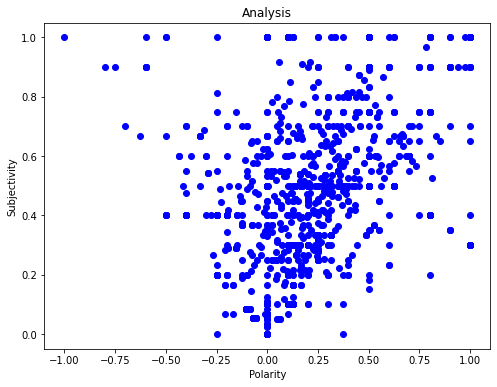

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')
plt.title('Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

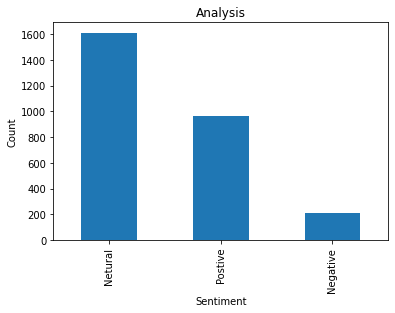

In [ ]:
df['Analysis'].value_counts()
plt.title('Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
def preprocess(textdata):
    processedText = []

    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet)
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        tweet = re.sub(userPattern,' USER', tweet)
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')

        processedText.append(tweetwords)

    return processedText

In [ ]:
text=df['Tweet']

In [ ]:
import time
import nltk
nltk.download('omw-1.4')
t = time.time()
nltk.download('wordnet')
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text Preprocessing complete.
Time Taken: 2 seconds


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data_pos = df[df['Analysis']=="Postive"]
data_neg = df[df['Analysis']=="Negative"]

In [ ]:
data_pos

,Date,User,Tweet,Subjectivity,Polarity,Analysis
3,2022-12-09 22:55:00+00:00,FIFAWorldCup,A thrilling day in Doha 🙌🔥\n\n FIFAWorldCup | ...,1.000000,0.250000,Postive
4,2022-12-09 22:49:07+00:00,FIFAWorldCup,🪄 Messi's incredible assist\n🎯 Unbelievable la...,0.750000,0.054167,Postive
5,2022-12-09 22:34:02+00:00,FIFAWorldCup,Brilliant effort and spirit to take the game a...,0.600000,0.220000,Postive
6,2022-12-09 22:24:33+00:00,FIFAWorldCup,Two Semi-final places have been confirmed! 🙌\n...,1.000000,0.500000,Postive
28,2022-12-09 21:34:45+00:00,FIFAWorldCup,Right then... who's heading to the Semi-finals? 🤔,0.535714,0.285714,Postive
...,...,...,...,...,...,...
2774,2022-11-01 16:30:03+00:00,FIFAWorldCup,Watch 'The Long Walk' for free on FIFA+ now! 👇,0.600000,0.225000,Postive
2775,2022-11-01 16:30:03+00:00,FIFAWorldCup,We've seen it all in FIFAWorldCup shootouts 🍿...,0.533333,0.016667,Postive
2776,2022-11-01 16:00:23+00:00,FIFAWorldCup,The Shaqiri show was on full display in 2014! ...,0.550000,0.437500,Postive
2780,2022-11-01 12:03:41+00:00,FIFAWorldCup,It’s FIFAWorldCup Month 🥳 and we’re continuin...,0.900000,0.250000,Postive


In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg['Tweet']))
plt.imshow(wc)

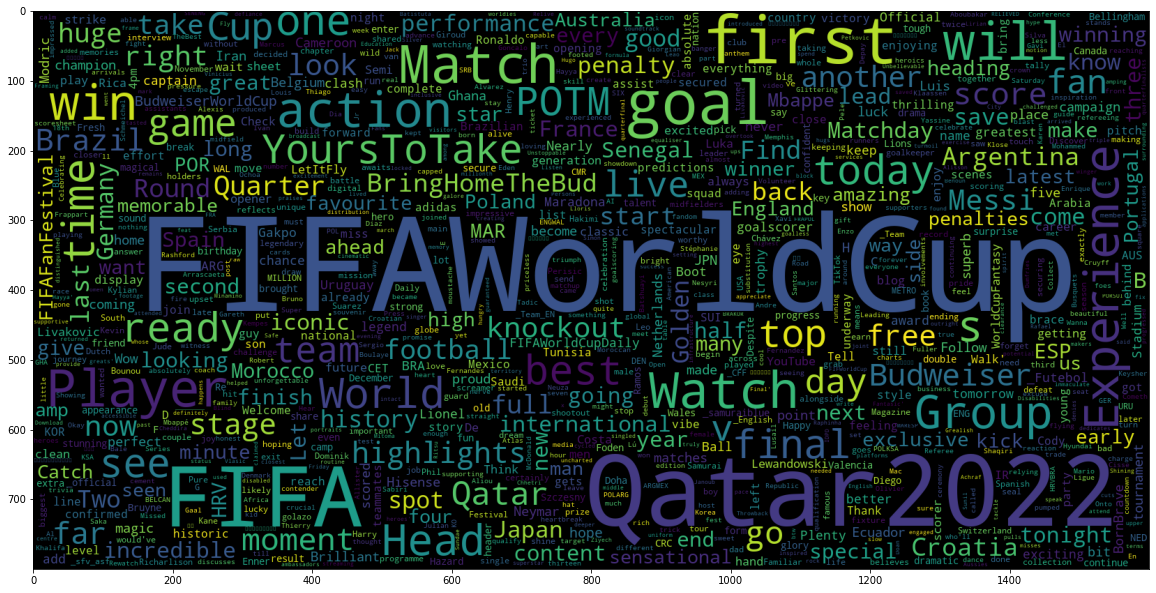

In [ ]:
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos['Tweet']))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
sentiment = df['Analysis']
sentiment=sentiment.tolist()
for i in sentiment:
  if i == "Postive":
    i=1
  elif i =="Negative":
    i=0
  else:
    del(i)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  14491


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [ ]:
def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive','Neutral']
    group_names = ['True Negative','False Posotive', 'False Negative','True Positive']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = True, cmap = 'Blues',fmt = ".2f",
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        10
     Netural       0.69      1.00      0.82        89
     Postive       1.00      0.27      0.42        41

    accuracy                           0.71       140
   macro avg       0.56      0.42      0.41       140
weighted avg       0.73      0.71      0.64       140



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


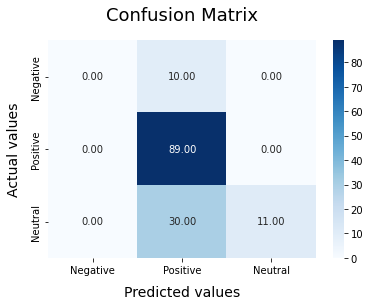

In [ ]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

    Negative       1.00      0.30      0.46        10
     Netural       0.87      0.97      0.91        89
     Postive       0.89      0.83      0.86        41

    accuracy                           0.88       140
   macro avg       0.92      0.70      0.75       140
weighted avg       0.89      0.88      0.87       140



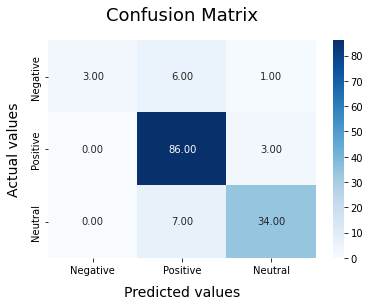

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

AttributeError: ignored